In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [43]:
data=pd.read_csv('iris.csv')
print(data)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [44]:
train_data=pd.DataFrame()
test_data=pd.DataFrame()
d1=data[data['Species']=='Iris-setosa'][0:40]
d2=data[data['Species']=='Iris-versicolor'][0:40]
d3=data[data['Species']=='Iris-virginica'][0:40]
train_data=pd.concat([d1,d2,d3])
test_data=data.loc[list(set(data.index)-set(train_data.index))]
print(train_data)




      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
135  136            7.7           3.0            6.1           2.3   
136  137            6.3           3.4            5.6           2.4   
137  138            6.4           3.1            5.5           1.8   
138  139            6.0           3.0            4.8           1.8   
139  140            6.9           3.1            5.4           2.1   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
135  

In [45]:
d4=d1['SepalLengthCm']
d5=d1['SepalWidthCm']
d6=d1['PetalLengthCm']
d7=d1['PetalWidthCm']
print(d1)

mean1=np.array([np.mean(d4),np.mean(d5),np.mean(d6),np.mean(d7)])
d1.drop(['Id','Species'],axis=1,inplace=True)
cov1=d1.cov()
print(cov1)


d4=d2['SepalLengthCm']
d5=d2['SepalWidthCm']
d6=d2['PetalLengthCm']
d7=d2['PetalWidthCm']

mean2=np.array([np.mean(d4),np.mean(d5),np.mean(d6),np.mean(d7)])
d2.drop(['Id','Species'],axis=1,inplace=True)
cov2=d2.cov()
print(cov2)

d4=d3['SepalLengthCm']
d5=d3['SepalWidthCm']
d6=d3['PetalLengthCm']
d7=d3['PetalWidthCm']

mean3=np.array([np.mean(d4),np.mean(d5),np.mean(d6),np.mean(d7)])
d3.drop(['Id','Species'],axis=1,inplace=True)
cov3=d3.cov()
print(cov3)





    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0    1            5.1           3.5            1.4           0.2  Iris-setosa
1    2            4.9           3.0            1.4           0.2  Iris-setosa
2    3            4.7           3.2            1.3           0.2  Iris-setosa
3    4            4.6           3.1            1.5           0.2  Iris-setosa
4    5            5.0           3.6            1.4           0.2  Iris-setosa
5    6            5.4           3.9            1.7           0.4  Iris-setosa
6    7            4.6           3.4            1.4           0.3  Iris-setosa
7    8            5.0           3.4            1.5           0.2  Iris-setosa
8    9            4.4           2.9            1.4           0.2  Iris-setosa
9   10            4.9           3.1            1.5           0.1  Iris-setosa
10  11            5.4           3.7            1.5           0.2  Iris-setosa
11  12            4.8           3.4            1.6           0.2

In [46]:
p1=len(d1)/len(train_data)
p2=len(d2)/len(train_data)
p3=len(d3)/len(train_data)



In [47]:
#no.of dimensions

d=len(train_data.columns)-2


In [48]:
def g(x,mean,cov,p):
    a=1/((2*math.pi)**(d/2))
    b=1/((np.linalg.det(cov))**(1/2))
    c=-1/2*(np.dot(np.dot((x-mean).T,np.linalg.inv(cov)),(x-mean)))
    return a*b*math.exp(c)*p


In [49]:
k=[]
count1=[0,0,0]
print(test_data['Species'])
for i in range(len(test_data)):
    x=test_data.iloc[i][0:5]
    X=np.array([x.SepalLengthCm,x.SepalWidthCm,x.PetalLengthCm,x.PetalWidthCm])
    if(g(X,mean1,cov1,p1)>g(X,mean2,cov2,p2) and g(X,mean1,cov1,p1)>g(X,mean3,cov3,p3)):
        k.append([x.Id,'Iris-setosa'])

#         print("Iris-setosa")
    elif(g(X,mean2,cov2,p2)>g(X,mean1,cov1,p1) and g(X,mean2,cov2,p2)>g(X,mean3,cov3,p3)):
        k.append([x.Id,'Iris-versicolor'])

#         print("Iris-versicolor")
    else:
        k.append([x.Id,'Iris-virginica'])

#         print("Iris-virginica")
        
k=pd.DataFrame(k,columns=['Id','Species'])
k.to_csv('output.csv',index=False)

#accuracy
count=0
print(k)
for i in range(len(test_data)):
    if(test_data.iloc[i]['Species']==k.iloc[i]['Species']):
        if(test_data.iloc[i]['Species']=='Iris-setosa'):
            count1[0]+=1
        if(test_data.iloc[i]['Species']=='Iris-versicolor'):
            count1[1]+=1
        if(test_data.iloc[i]['Species']=='Iris-virginica'):
            count1[2]+=1
        count=count+1



140     Iris-virginica
141     Iris-virginica
142     Iris-virginica
143     Iris-virginica
144     Iris-virginica
145     Iris-virginica
146     Iris-virginica
147     Iris-virginica
148     Iris-virginica
149     Iris-virginica
40         Iris-setosa
41         Iris-setosa
42         Iris-setosa
43         Iris-setosa
44         Iris-setosa
45         Iris-setosa
46         Iris-setosa
47         Iris-setosa
48         Iris-setosa
49         Iris-setosa
90     Iris-versicolor
91     Iris-versicolor
92     Iris-versicolor
93     Iris-versicolor
94     Iris-versicolor
95     Iris-versicolor
96     Iris-versicolor
97     Iris-versicolor
98     Iris-versicolor
99     Iris-versicolor
Name: Species, dtype: object
     Id          Species
0   141   Iris-virginica
1   142   Iris-virginica
2   143   Iris-virginica
3   144   Iris-virginica
4   145   Iris-virginica
5   146   Iris-virginica
6   147   Iris-virginica
7   148   Iris-virginica
8   149   Iris-virginica
9   150   Iris-virginica
10   4

In [50]:
print("Accuracy is ",count/len(test_data)*100)
d8=test_data[test_data['Species']=='Iris-setosa']
d9=test_data[test_data['Species']=='Iris-versicolor']
d10=test_data[test_data['Species']=='Iris-virginica']


Accuracy is  100.0


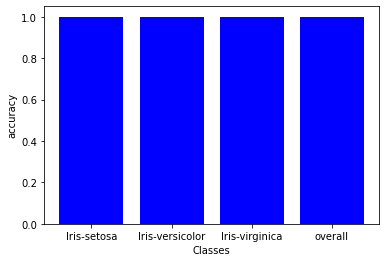

In [51]:
#plotting the accuracy

count1.append(count)
dict1={'Iris-setosa':count1[0]/len(d8),'Iris-versicolor':count1[1]/len(d9),'Iris-virginica':count1[2]/len(d10),'overall':count1[3]/len(test_data)}
labels = list(dict1.keys())
values = list(dict1.values())
plt.bar(labels, values, color='blue')
plt.xlabel('Classes')
plt.ylabel('accuracy')

plt.show()